# Annexe 1: Code projet Affinity Propagation

In [1]:
# Importation des packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
from itertools import cycle
from sklearn.cluster import AffinityPropagation
import collections
from scipy import linalg

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Fonctions 
def comparaisonliste(liste1):
    res_comparaison = np.zeros(len(liste1))
    for i,j in enumerate(liste1):
        res_comparaison[i]=min(0,j)
    return res_comparaison

In [7]:
def affinitypropagation(x):
    # Paramètres généraux
    n = x.shape[0]
    lambda1 = 0.5
    ite = 30                    #nb d'itérations
    
    # Matrices
    s = np.zeros((n,n))         #similarity
    a = np.zeros((n,n))         #availability
    r = np.zeros((n,n))         #responsibility
    center = np.zeros(n)        #centres
    iparmin = np.arange(n)
    
    # Matrice similarité
    for i in range(n):
        for k in range((i+1),n):
            s[i,k]=-np.linalg.norm(x[i]-x[k])
    s = s + np.transpose(s)
    pref=np.median(s)
    s.flat[::(n + 1)] = pref #même chose que s = s + pref*np.identity(n) pour rajouter la préférence en diagonale
    
    # Boucle 
    for it in range(ite):
        somme1 = np.zeros((n,n))
        res1 = np.zeros((n,n))
        max1 = np.zeros((n,n))
        res2 = np.zeros((n,n))
        
        # Matrice responsibility
        somme1 = a + s
        indmax = np.argmax(somme1, axis=1)     #valeur du k max par ligne
        vmax = np.max(somme1, axis=1)          #valeur maximale par ligne
        somme1[iparmin, indmax] = -np.inf      #on met ces valeurs à - l'infini
        vmax2 = np.max(somme1, axis=1)         #nouvelle valeur maximale par ligne  
        
        # On calcule le nouveau r = s - max(a+s)
        np.subtract(s, vmax[:, None], res1)
        # Pour les valeurs telles que le max tombe pour ce k, on prend le deuxième max
        res1[iparmin, indmax] = s[iparmin, indmax] - vmax2 
        
        # Mise à jour de la valeurs
        r = (1-lambda1)*res1 + lambda1*r  
        
        # Matrice availability
        np.maximum(r,0,max1)
        for k in range(n):
            res2[iparmin,k] = comparaisonliste(r[k,k]+sum(max1[:,k])-max1[iparmin,k]-max1[k,k])
            res2[k,k] = (sum(max1[:,k])-max1[k,k])
        # Mise à jour de la valeurs
        a = (1-lambda1)*res2 + lambda1*a
        
    # Calcul des centres
    for i in range(n):
        somme4=np.zeros(n)
        somme4=a[i,:]+r[i,:]
        index_max = np.argmax(somme4)
        center[i]=index_max
    
    return pref, center

--------------------
Résultats pour l'algorithme AP implémenté
Nombre de clusters: 12
Les différents centres sont :
dict_keys([96.0, 69.0, 39.0, 105.0, 140.0, 142.0, 47.0, 48.0, 116.0, 86.0, 91.0, 93.0])
--------------------
Résultats pour l'algorithme AP sklearn
Nombre de clusters: 10
Les différents centres sont :
[ 47  48  78  83  86  89  93 105 116 140]


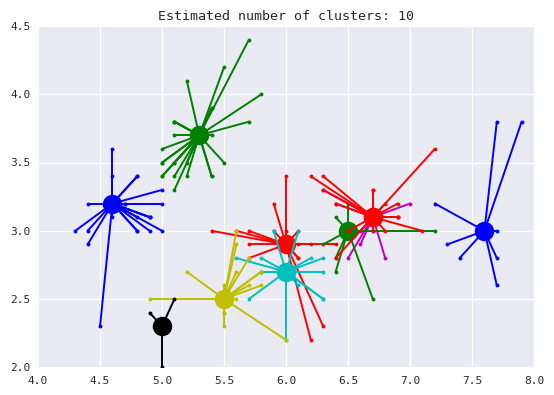

In [9]:
#==============================================================================
# Algorithme implémenté
#==============================================================================

pref, center = affinitypropagation(X)
print('--------------------')
print("Résultats pour l'algorithme AP implémenté")
print('Nombre de clusters: %d' % len(collections.Counter(center)))
print('Les différents centres sont :')
print(collections.Counter(center).keys())
print('--------------------')

#==============================================================================
# Comparaison avec la fonction sklearn
#==============================================================================

print("Résultats pour l'algorithme AP sklearn")
af = AffinityPropagation(preference=pref).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print('Nombre de clusters: %d' % n_clusters_)
print('Les différents centres sont :')
print(cluster_centers_indices)

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()